In [1]:
%load_ext autoreload
%autoreload

import sys
import time

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tabulate import tabulate
from joblib import dump, load
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.decomposition import PCA
from sklearn.metrics import roc_curve, auc

sys.path.append('../')
from LinearModels import display_plot_logreg, display_plot_svc
sys.path.append('../../')
from utils import feature_selection, thomas_parser, PCA_reduction, perf, time_comparison
from toBoolean import convert

### Features relevance

Here below we will follow an iterative process in order to select the most relevant features of our model. The way it works is as follow : first we start a small training set, measure the accuracy and select the most relevant features using *SelectFromModel*. Then we apply the same reasoning on a slightly larger training set. Between two iterations, the set of features that is kept is the intersection between the current best features and the previous ones.

In [3]:
gt = pd.read_csv('../../../dumps/2020.02.10-12.14.csv')
cols = [col for col in gt.columns if col not in ['label']]
raw_data = gt[cols]
raw_target = gt['label']

First step, we start with a training set of 20% of the whole dataset.

In [5]:
#Computing initial accuracies without tuning
data_train, data_test, target_train, target_test = train_test_split(raw_data, raw_target, test_size = 0.85, random_state = 0)
scaler = Normalizer()
scaler.fit(data_train)
data_train = scaler.transform(data_train)
data_test = scaler.transform(data_test)
data_train = pd.DataFrame(data=data_train[0:,0:],
                    index=[i for i in range(data_train.shape[0])],
                    columns=['f'+str(i) for i in range(data_train.shape[1])])
data_test = pd.DataFrame(data=data_test[0:,0:],
                    index=[i for i in range(data_test.shape[0])],
                    columns=['f'+str(i) for i in range(data_test.shape[1])])
print(data_train.shape)
logreg = LogisticRegression(C=0.01, max_iter=100)
logreg.fit(data_train, target_train)
print("Training set score: {:.3f}".format(logreg.score(data_train, target_train))) 
print("Test set score: {:.3f}".format(logreg.score(data_test, target_test)))

#Select best features
model = SelectFromModel(logreg, prefit=True)
train_new = model.transform(data_train)
print(train_new.shape)
mask = model.get_support()
A_set = data_train.columns[mask]

#Creating new dataset with only wanted features and computing new accuracies
gt = pd.read_csv('../../../dumps/2020.02.10-12.14.csv')
data = gt[A_set]
target = gt['label']
data_train, data_test, target_train, target_test = train_test_split(data,target, test_size = 0.85, random_state = 0)
scaler = Normalizer()
scaler.fit(data_train)
data_train = scaler.transform(data_train)
data_test = scaler.transform(data_test)
data_train = pd.DataFrame(data=data_train[0:,0:],
                    index=[i for i in range(data_train.shape[0])],
                    columns=['f'+str(i) for i in range(data_train.shape[1])])
data_test = pd.DataFrame(data=data_test[0:,0:],
                    index=[i for i in range(data_test.shape[0])],
                    columns=['f'+str(i) for i in range(data_test.shape[1])])
logreg.fit(data_train, target_train)
print("Training set score: {:.3f}".format(logreg.score(data_train, target_train))) 
print("Test set score: {:.3f}".format(logreg.score(data_test, target_test)))

(1196, 119)
Training set score: 0.889
Test set score: 0.897
(1196, 42)
Training set score: 0.889
Test set score: 0.897


We now increase the size of the training set.

In [6]:
#Computing initial accuracies without tuning
data_train, data_test, target_train, target_test = train_test_split(raw_data, raw_target, test_size = 0.70, random_state = 0)
scaler = Normalizer()
scaler.fit(data_train)
data_train = scaler.transform(data_train)
data_test = scaler.transform(data_test)
data_train = pd.DataFrame(data=data_train[0:,0:],
                    index=[i for i in range(data_train.shape[0])],
                    columns=['f'+str(i) for i in range(data_train.shape[1])])
data_test = pd.DataFrame(data=data_test[0:,0:],
                    index=[i for i in range(data_test.shape[0])],
                    columns=['f'+str(i) for i in range(data_test.shape[1])])
print(data_train.shape)
logreg = LogisticRegression(C=0.01, max_iter=100)
logreg.fit(data_train, target_train)
print("Training set score: {:.3f}".format(logreg.score(data_train, target_train))) 
print("Test set score: {:.3f}".format(logreg.score(data_test, target_test)))

#Select best features
model = SelectFromModel(logreg, prefit=True)
train_new = model.transform(data_train)
print(train_new.shape)
mask = model.get_support()
B_set = data_train.columns[mask]

#Creating new dataset with only wanted features and computing new accuracies
gt = pd.read_csv('../../../dumps/2020.02.10-12.14.csv')
data = gt[B_set]
target = gt['label']
data_train, data_test, target_train, target_test = train_test_split(data,target, test_size = 0.70, random_state = 0)
scaler = Normalizer()
scaler.fit(data_train)
data_train = scaler.transform(data_train)
data_test = scaler.transform(data_test)
data_train = pd.DataFrame(data=data_train[0:,0:],
                    index=[i for i in range(data_train.shape[0])],
                    columns=['f'+str(i) for i in range(data_train.shape[1])])
data_test = pd.DataFrame(data=data_test[0:,0:],
                    index=[i for i in range(data_test.shape[0])],
                    columns=['f'+str(i) for i in range(data_test.shape[1])])
logreg.fit(data_train, target_train)
print("Training set score: {:.3f}".format(logreg.score(data_train, target_train))) 
print("Test set score: {:.3f}".format(logreg.score(data_test, target_test)))

#Creating new dataset with A's best features and computing new accuracies
gt = pd.read_csv('../../../dumps/2020.02.10-12.14.csv')
data = gt[A_set]
target = gt['label']
data_train, data_test, target_train, target_test = train_test_split(data,target, test_size = 0.70, random_state = 0)
scaler = Normalizer()
scaler.fit(data_train)
data_train = scaler.transform(data_train)
data_test = scaler.transform(data_test)
data_train = pd.DataFrame(data=data_train[0:,0:],
                    index=[i for i in range(data_train.shape[0])],
                    columns=['f'+str(i) for i in range(data_train.shape[1])])
data_test = pd.DataFrame(data=data_test[0:,0:],
                    index=[i for i in range(data_test.shape[0])],
                    columns=['f'+str(i) for i in range(data_test.shape[1])])
print(data_train.shape)
logreg.fit(data_train, target_train)
print("Training set score: {:.3f}".format(logreg.score(data_train, target_train))) 
print("Test set score: {:.3f}".format(logreg.score(data_test, target_test)))

#Intersection of two subsets with the best features
C_set = [value for value in B_set if value in A_set]

(2393, 119)
Training set score: 0.901
Test set score: 0.894
(2393, 43)
Training set score: 0.901
Test set score: 0.894
(2393, 42)
Training set score: 0.901
Test set score: 0.894


We now carry on repeating the same process : increasing the training set, finding the best features and the intersection with the previous set until convergence.

0.15
(1196, 119)
(1196, 42)
0.3
(2393, 119)
(2393, 43)
30
0.44999999999999996
(3589, 119)
(3589, 39)
21
0.6
(4786, 119)
(4786, 38)
16
0.75
(5982, 119)
(5982, 38)
13
0.9
(7179, 119)
(7179, 34)
10


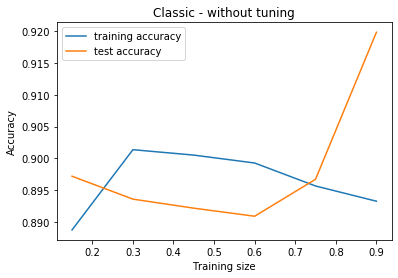

Training max value : 0.9013790221479314
Test max value : 0.9197994987468672


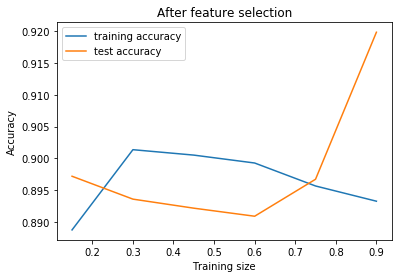

Training max value : 0.9013790221479314
Test max value : 0.9197994987468672


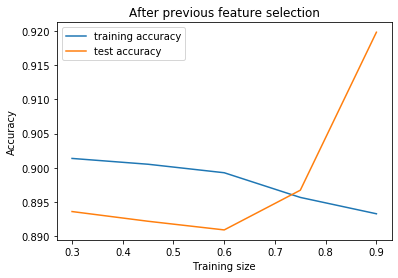

Training max value : 0.9013790221479314
Test max value : 0.9197994987468672


In [7]:
feature_selection('../../../dumps/2020.02.10-12.14.csv', 0.15, "log")

All results are the same, which means that the model can definitely be reduced to a few number of features.

Let's, once more, try the feature extraction on a dataset of 14K samples and see how the performances are impacted.

0.15
(2205, 119)
(2205, 8)
0.3
(4410, 119)
(4410, 9)
8
0.44999999999999996
(6616, 119)
(6616, 9)
8
0.6
(8821, 119)
(8821, 9)
8
0.75
(11027, 119)
(11027, 9)
8
0.9
(13232, 119)
(13232, 9)
8


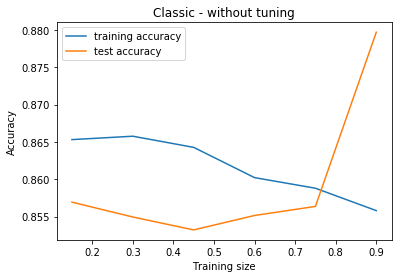

Training max value : 0.8657596371882086
Test max value : 0.8796736913664174


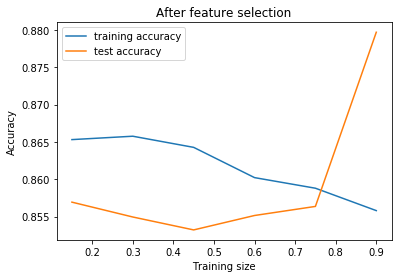

Training max value : 0.8657596371882086
Test max value : 0.8796736913664174


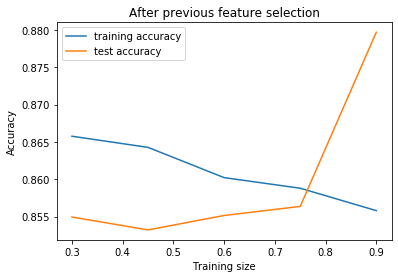

Training max value : 0.8657596371882086
Test max value : 0.8796736913664174


In [8]:
feature_selection('../../../dumps/2020.03.11-17.39.csv',0.15,"log")

We can observe that after the first iteration and until the end, the 8 same features are always selected for the last case. Once again, since all values are the same, we can conclude than our model doesn't need more than 8 features in order to be efficient.